In [4]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
#from sklearn.datasets import load_boston

# with open-source packages
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import ReciprocalTransformer

In [5]:
# load the the Boston House price data from Scikit-learn

# this is how we load the boston dataset from sklearn
#boston_dataset = load_boston()
from sklearn.datasets import fetch_openml
import pandas as pd

# Load dataset
boston_dataset = fetch_openml(name="boston", version=1, as_frame=True)

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# display top 5 rows (not in book recipe)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


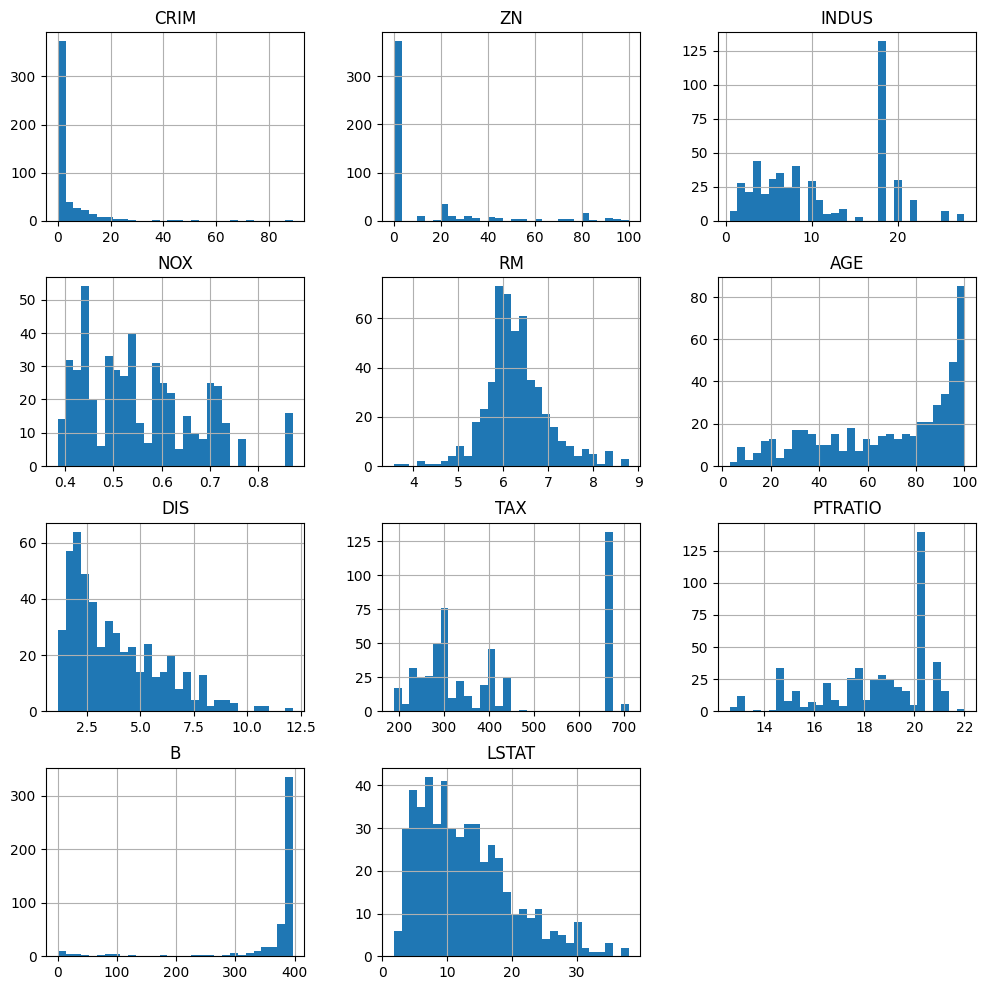

In [6]:
# plot the histogram to inspect variable distributions (not in book)

data.hist(bins=30, figsize=(12,12))
plt.show()

In [9]:
# plot histogram and Q-Q plots to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

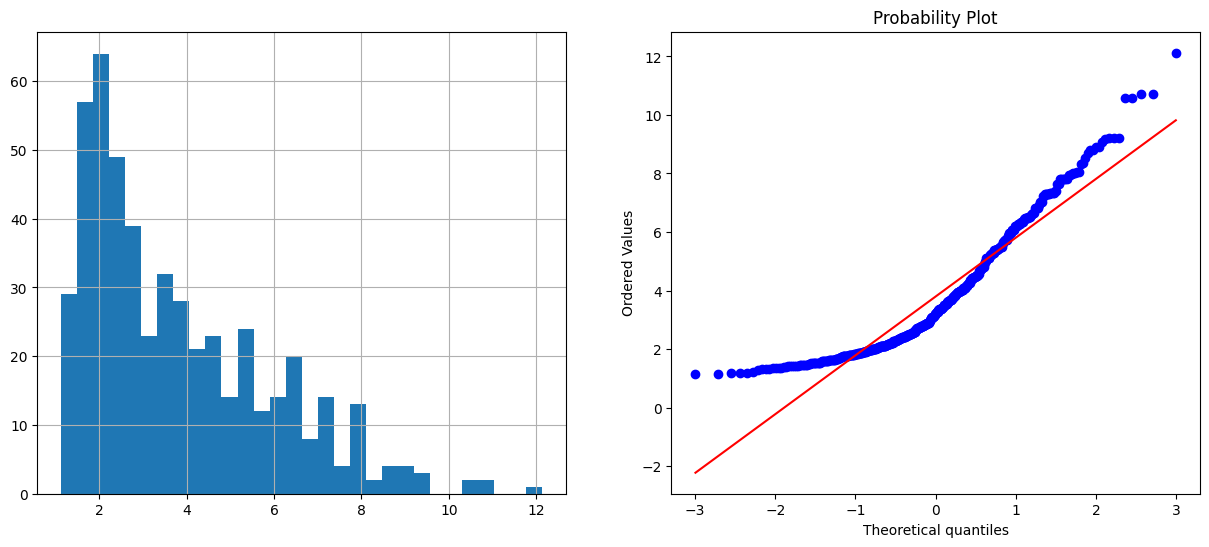

In [10]:
# check original distribution of the variable DIS

diagnostic_plots(data, 'DIS')

 ## Reciprocal transformation with NumPy

In [11]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

In [12]:
# apply the reciprocal to a set of variables

data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.reciprocal(data[['LSTAT', 'NOX', 'DIS', 'RM']])

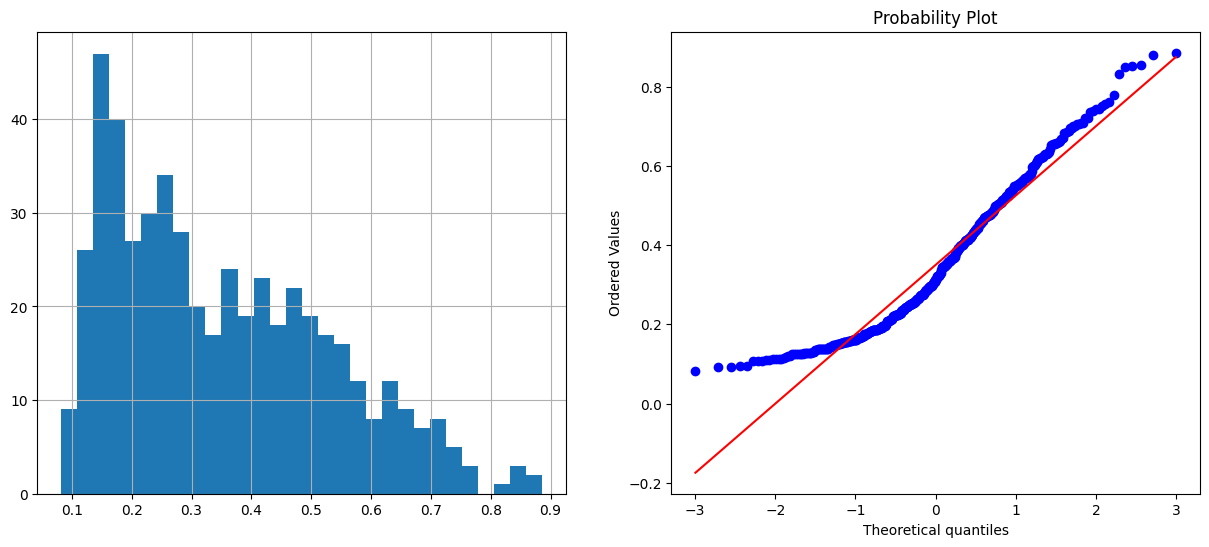

In [13]:
# use diagnostic plot function to address variable transformation

diagnostic_plots(data_tf, 'DIS')

 ## Reciprocal transformation with Scikit-learn

In [17]:
# start the transformer with NumPy reciprocal as argument

transformer = FunctionTransformer(np.reciprocal, validate=True)

In [18]:
# make a list of columns to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# transform subset of dataframe
data_tf = transformer.transform(data[cols])

C:\Users\manpr\anaconda3\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [19]:
# capture returned NumPy array in pandas dataframe

data_tf = pd.DataFrame(data_tf, columns=cols)

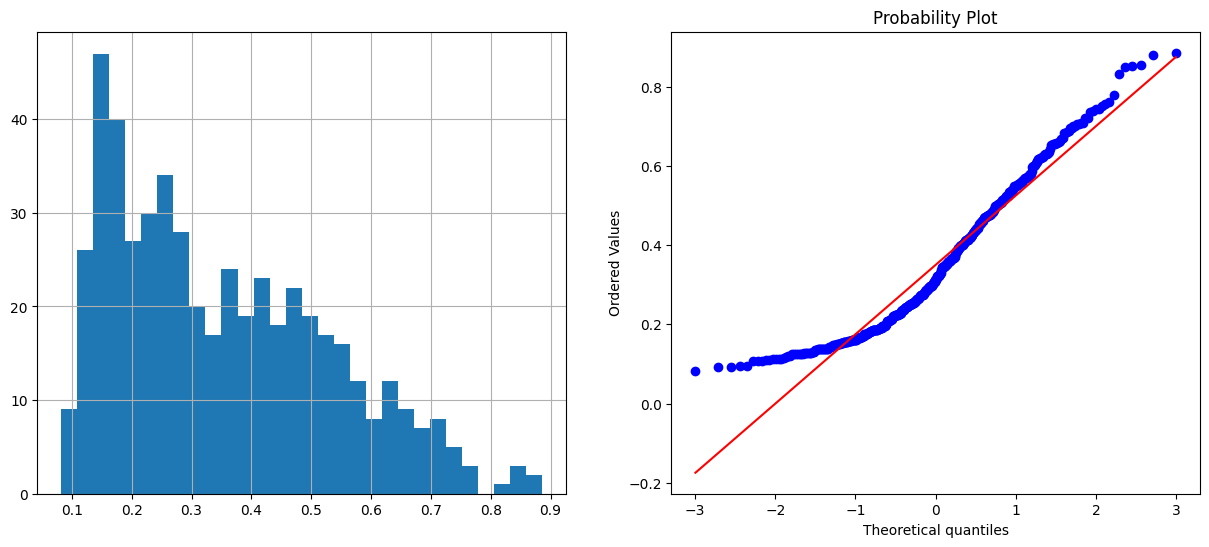

In [20]:
# use diagnostic plot function to evaluate transformation
# (not in book)

diagnostic_plots(data_tf, 'DIS')

 ## Reciprocal transformation with Feature-engine

In [21]:
# initialize the transformer
rt = ReciprocalTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'])

# fit transformer to the entire dataframe
rt.fit(data)

ReciprocalTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [22]:
# transform the indicated variables within our data set
data_tf = rt.transform(data)

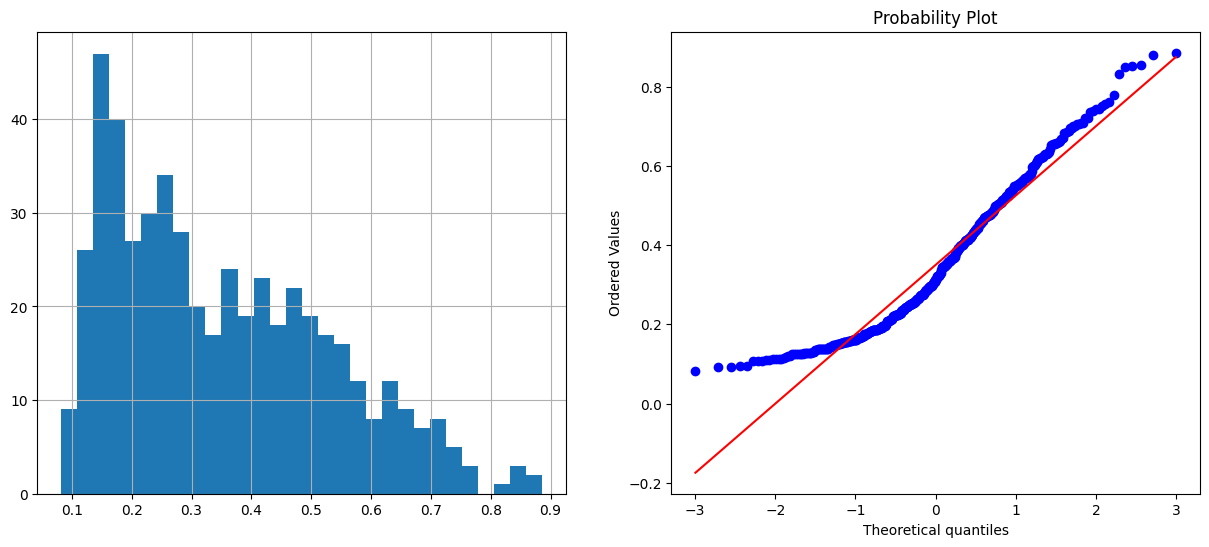

In [23]:
# use diagnostic plot function to evaluate transformation
# (not in book)

diagnostic_plots(data_tf, 'DIS')